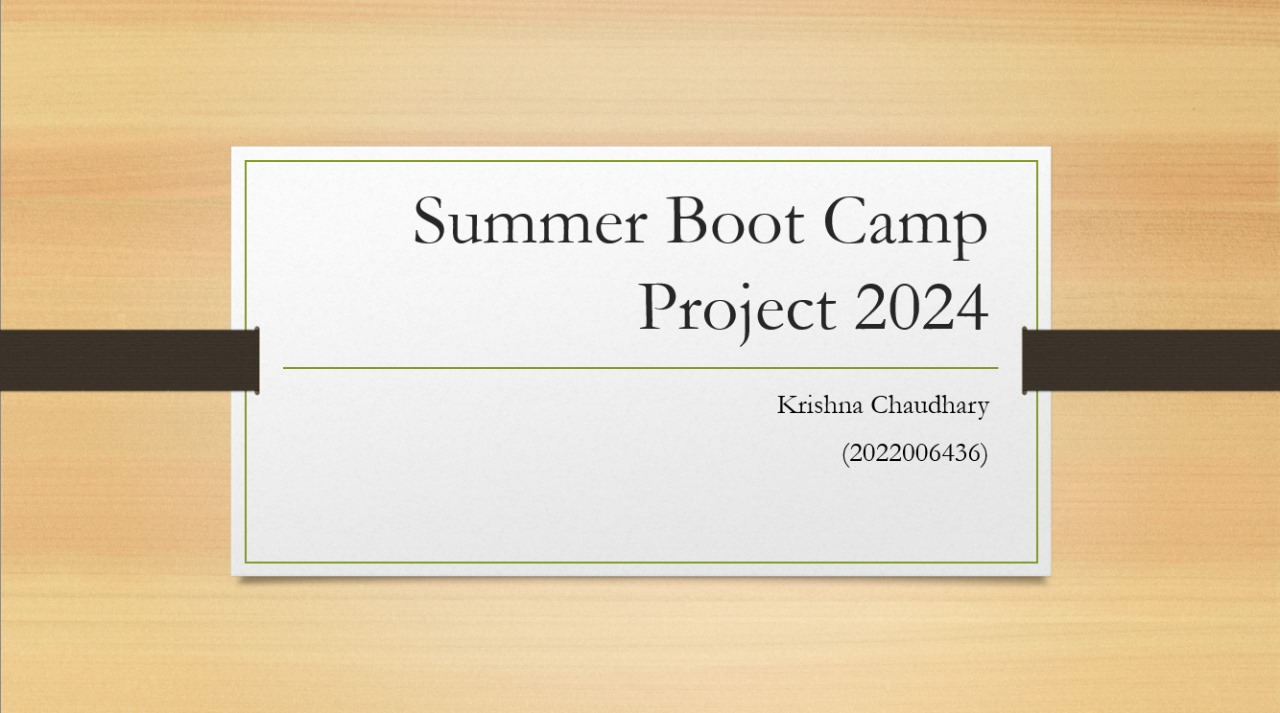

# INDEX

## List Of Tables

## List Of Figures


## Problem Statement Objective 
 The food aggregator company has stored the data of the different orders made by the registered customers in their online portal.
 They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their
 customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of
 the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the
 company to improve the business.
 
 
 ## Importing The Necessary Libraries





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading The Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\2-foodhub_order_New.csv")

##  Basic Exploration

#### Data Head(Top 5 rows)

In [3]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


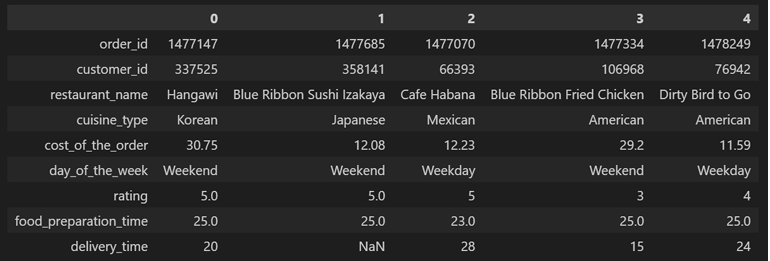

#### Data Tail(last 5 Rows)

In [4]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


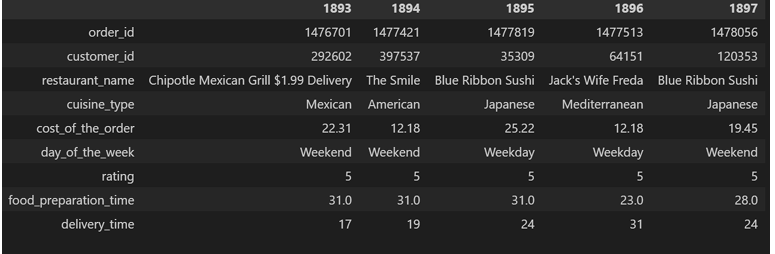

## Observation

 In Delivery_time '?' is there need to check in future
 
 In Rating , In some of the data rating is "Not given"

## Data Wrangling

#### Shape of Data

In [5]:
df.shape

(1898, 9)

 #### Number of Rows are 1898 and Number of columns are 9

##  Data Types of Each Feature

In [6]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

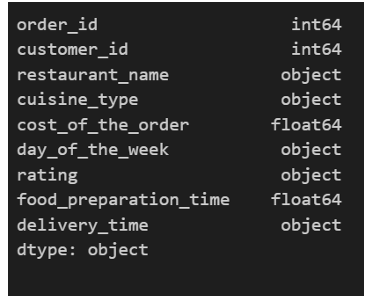

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


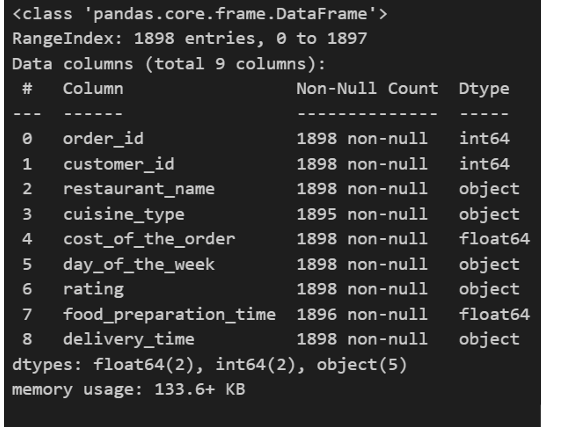

## Observation

#### delivery time is apearing as "object" but it should be in "int"

#### rating is apeaaring as "obejct" but it should be in "int"

## Statistical Summary

In [9]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


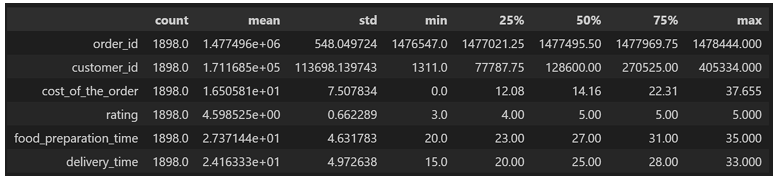

## Observation

####  cost of the order is 0.00 at minimum

## The Null Values

#### Check For Missing Values in Columns

In [10]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

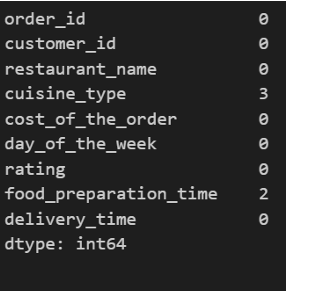

## Observation

#### 3 NULL value are in Cuisine type and 2 NULL values are in Food delivery Time

#### To fetch all the rows having atleast one NULL value

In [11]:
df[df.isnull().sum(axis=1)>0]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
11,1478437,221206,Empanada Mama (closed),NaN,8.10,Weekend,5,23.0,22
51,1477883,91817,Blue Ribbon Fried Chicken,NaN,29.39,Weekend,Not given,27.0,28
95,1477027,164016,Blue Ribbon Fried Chicken,NaN,16.39,Weekend,Not given,27.0,22
140,1477376,370372,Blue Ribbon Fried Chicken,American,11.59,Weekday,Not given,NaN,24
188,1477872,300670,Shake Shack,American,13.39,Weekend,Not given,NaN,22


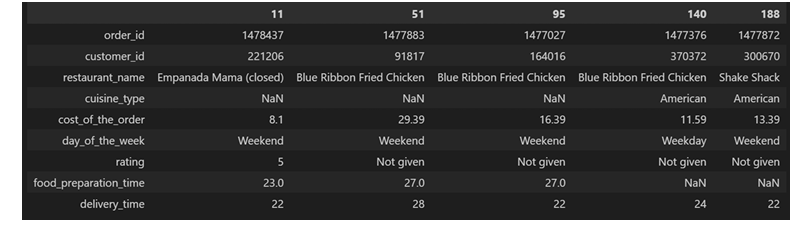

#### Check for percentage wise missing values in columns

In [12]:

 df.isnull().sum()/len(df)*100

order_id                 0.000000
customer_id              0.000000
restaurant_name          0.000000
cuisine_type             0.158061
cost_of_the_order        0.000000
day_of_the_week          0.000000
rating                   0.000000
food_preparation_time    0.105374
delivery_time            0.000000
dtype: float64

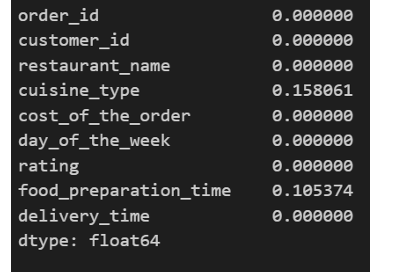

## The Duplicate values

####  Check for the duplicate values


In [13]:
df.duplicated().sum()

0

####  As there are zero duplicate values

##  The Anomalies or Wrong Entries

#### From above Obvervation we found wrong entry in delivery time
####  Check for all unique values in delivery time

In [14]:
df['delivery_time'].unique()

array(['20', '?', '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

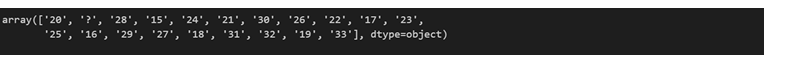

####  Shows the columns which have entry '?' in delivery Time

In [15]:
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?


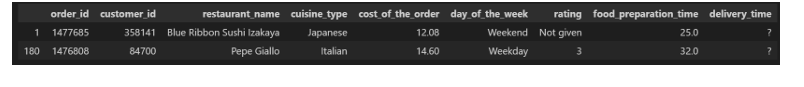

#### Replacing all '?' with the NULL

In [16]:
df['delivery_time']=df['delivery_time'].replace('?',np.nan)

In [17]:
df['delivery_time'].unique()

array(['20', nan, '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

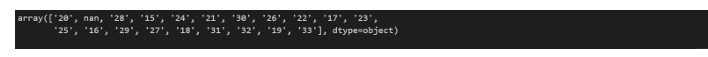

#### Now there is not any wrong entry in the "Delivery time"

####  From The Above Observattion "Not given" is mention in the "Rating"

####  From The Above Observattion "Not given" is mention in the "Rating"
 
####  From The Above Observattion "Not given" is mention in the "Rating"
#### Check for all unique values

In [18]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

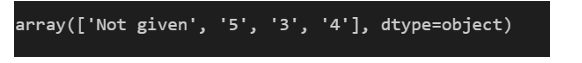

####  Shows the columns which have entry 'Not given' in rating

In [19]:
df[df['rating']=="Not given"]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,NaN
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28.0,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34.0,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23.0,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26.0,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22.0,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29.0,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24


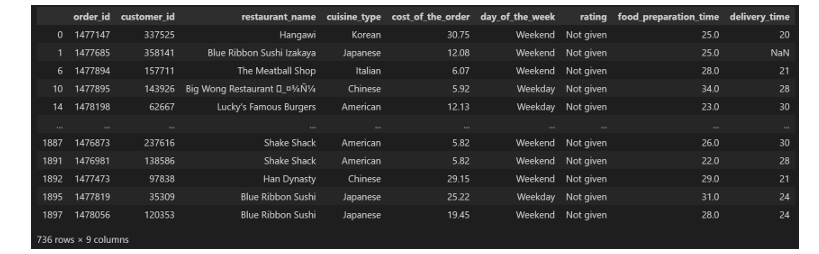

#### Replacing all 'Not given' with the NULL

In [20]:
df['rating']=df['rating'].replace('Not given',np.nan)

In [21]:
 df['rating'].unique()


array([nan, '5', '3', '4'], dtype=object)

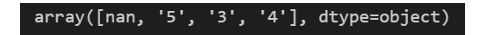

#### Now there is not any wrong entry in the rating

###  Outliers

####  First Check for Outliers


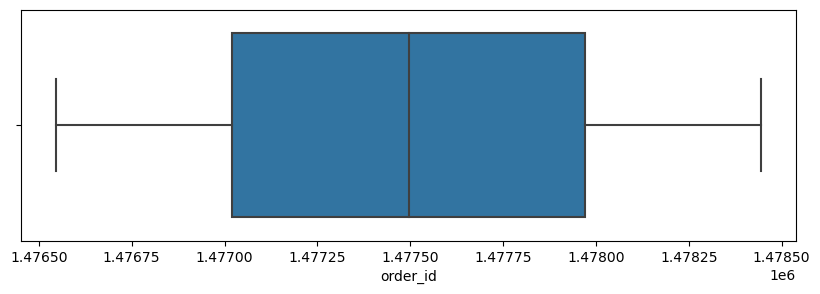

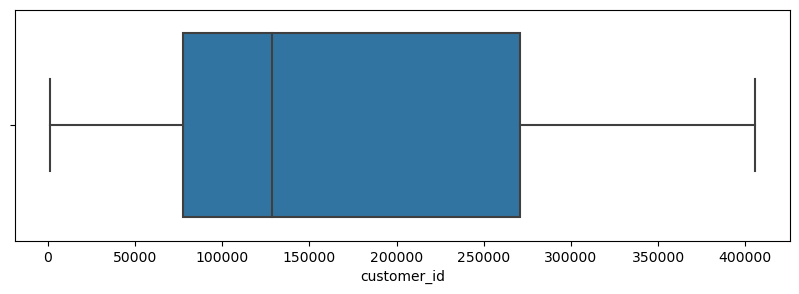

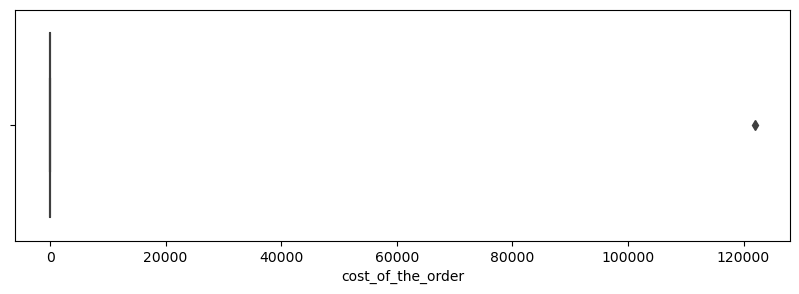

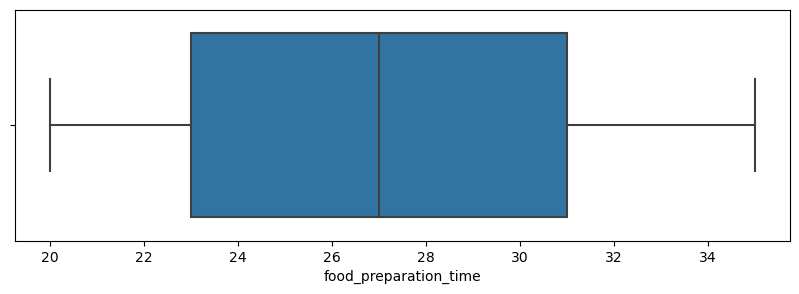

In [22]:
for i in ['order_id','customer_id','cost_of_the_order','food_preparation_time']:
 plt.figure(figsize=(10,3))
 sns.boxplot(data=df,x=i)
 plt.show()

####  Outliers in 'order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time

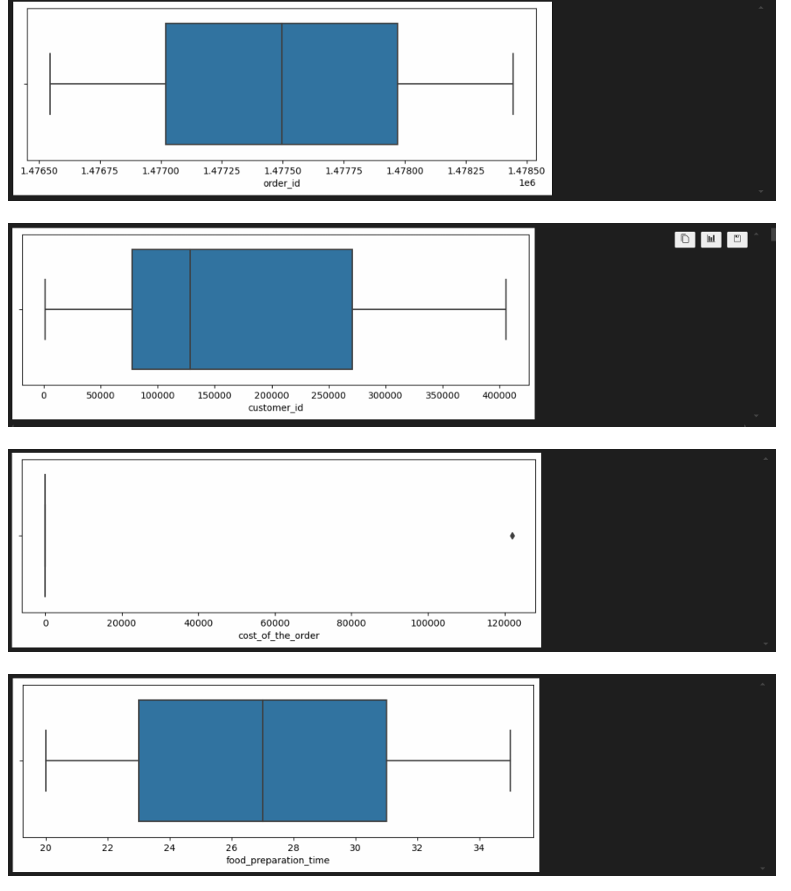

#### Removing Outliers

In [23]:
def remove_outliers(col):
sorted(col)
Q1,Q3=col.quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)
return lower_range,upper_range

####  Since, ouliers is present in Cost of the order so REPLACING NULL values in Numerical Columns using Median

In [24]:
median1=df['cost_of_the_order'].median()
median2=df['customer_id'].median()
median3=df['order_id'].median()
median4=df['food_preparation_time'].median()
# median5=df['rating'].median()
median6=df['delivery_time'].median()
df['cost_of_the_order'].replace(np.nan,median1,inplace=True)
df['customer_id'].replace(np.nan,median2,inplace=True)
df['order_id'].replace(np.nan,median3,inplace=True)
df['food_preparation_time'].replace(np.nan,median4,inplace=True)
# df['rating'].replace(np.nan,median5,inplace=True)
df['delivery_time'].replace(np.nan,median6,inplace=True)

 #### REPLACING NULL values in categorical columns using Mode

In [28]:
mode1=df['restaurant_name'].mode().values[0]
mode2=df['cuisine_type'].mode().values[0]
mode3=df['day_of_the_week'].mode().values[0]
    
df['restaurant_name']=df['restaurant_name'].replace(np.nan,mode1)
df['cuisine_type']=df['cuisine_type'].replace(np.nan,mode2)
df['day_of_the_week']=df['day_of_the_week'].replace(np.nan,mode3)

In [29]:
ll,ul=remove_outliers(df['cost_of_the_order'])
df['cost_of_the_order']=np.where(df['cost_of_the_order']>ul,ul,df['cost_of_the_order'])
df['cost_of_the_order']=np.where(df['cost_of_the_order']<ll,ll,df['cost_of_the_order'])

#### Boxplots after Outliers treatment

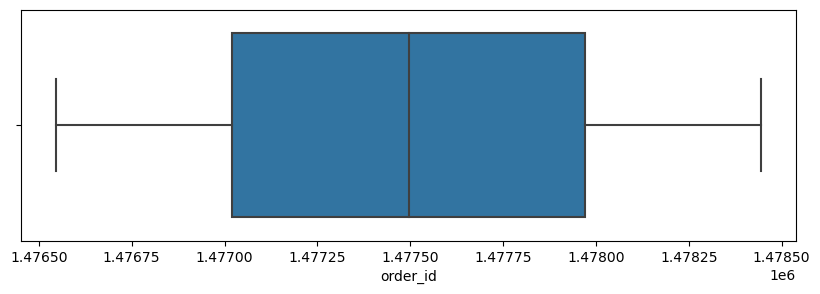

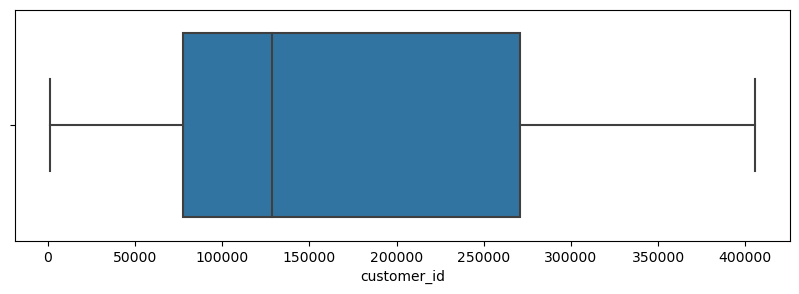

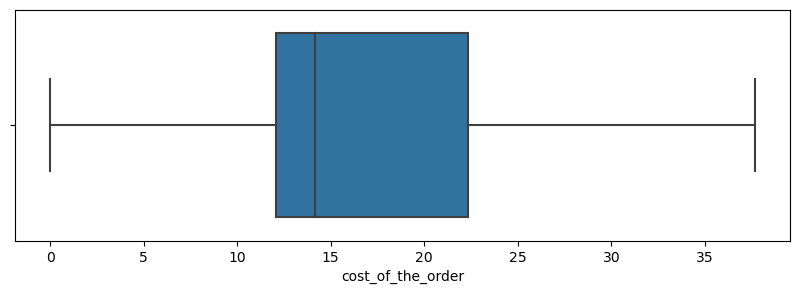

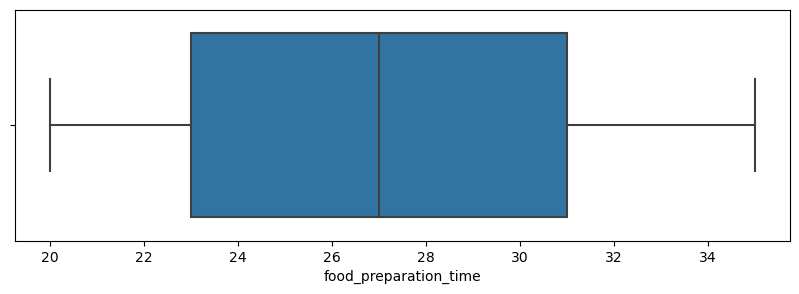

In [31]:
for i in ['order_id','customer_id','cost_of_the_order','food_preparation_time']:
 plt.figure(figsize=(10,3))
 sns.boxplot(data=df,x=i)
 plt.show()


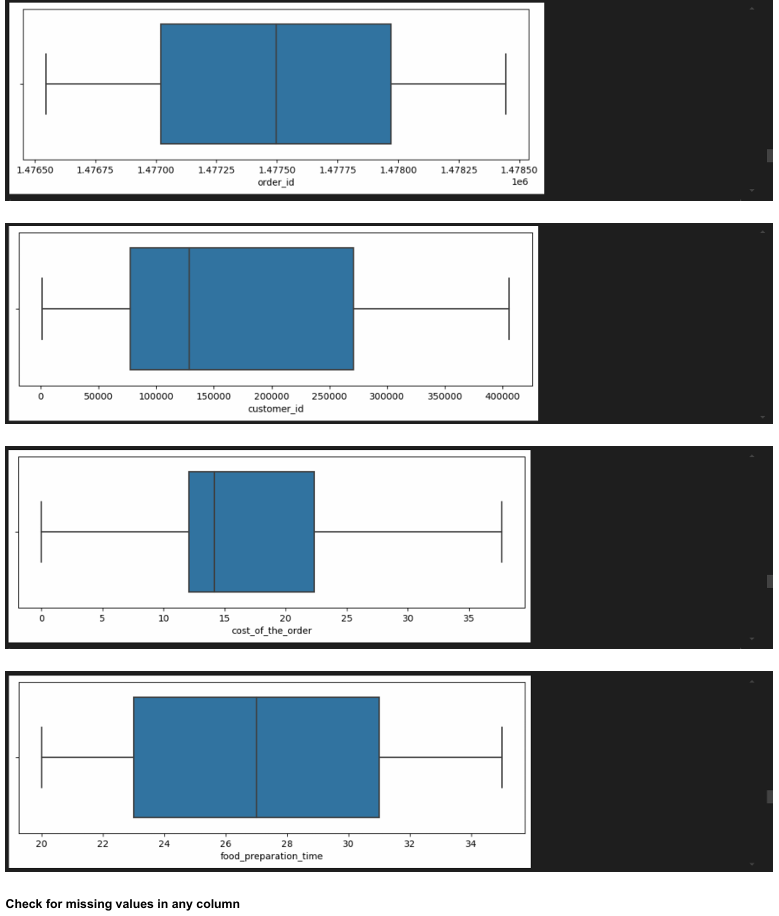

In [32]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

##  1. Order Analysis
####  a) What is the total number of orders in the dataset ?

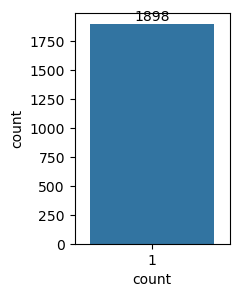

In [34]:
 plt.figure(figsize=(2,3))
 tno=sns.countplot(data=df,x=df['order_id'].value_counts())
 for bars in tno.containers:
    tno.bar_label(bars)

####  =>The Total number of orders are 1898
####  b) What is the average cost of an order?

In [35]:
average_cost_of_order=df['cost_of_the_order'].mean()
average_cost_of_order

16.50580874604847

####  =>The Average Cost of Order is 16.50
####  c) How many unique customers have placed orders?

In [36]:
unique_customers=df['customer_id'].nunique()
unique_customers

1200

#### =>The total Number of Unique customers have placed orders are 1200
####  d) Which restaurant has received the highest number of orders

In [38]:
restaurant_order_counts = df['restaurant_name'].value_counts()
top_restaurant = restaurant_order_counts.idxmax()
top_order_count = restaurant_order_counts.max()
top_restaurant,top_order_count

('Shake Shack', 219)

####  =>Restaurant Shake Shack has received the highest number of orders : 219

## 2. Customer Behavior
#### a) What is the average rating given by customers?

In [39]:

 df['rating'].unique()

array([nan, '5', '3', '4'], dtype=object)

In [40]:

 df['rating']=df['rating'].replace(np.nan,0)

In [41]:
df['rating']=df['rating'].astype('int')

In [42]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                     int32
food_preparation_time    float64
delivery_time             object
dtype: object

In [43]:
df['rating']=df['rating'].replace(0,np.nan)

In [44]:
 df['rating'].mean(skipna=True)

4.344234079173838

####  => The Average Rating given by Customers is 4.3
#### b) How does the rating vary between weekdays and weekends?

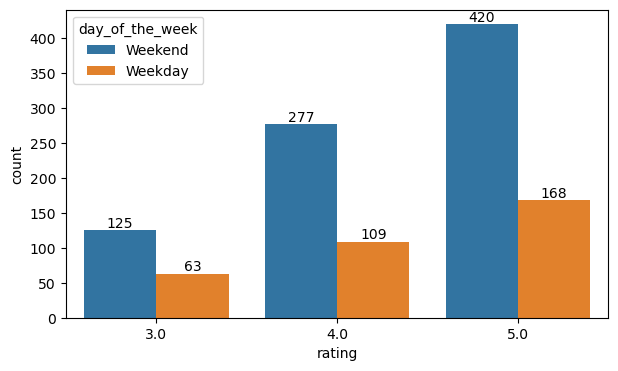

In [47]:
plt.figure(figsize=(7,4))
bx = sns.countplot(data=df,x="rating",hue="day_of_the_week")
for bars in bx.containers:
    bx.bar_label(bars)

 #### c) Which cuisine type is ordered the most?

In [48]:
cuisine_type=df['cuisine_type'].value_counts()
top_cuisine_type=cuisine_type.idxmax()
most_cuisine_type=cuisine_type.max()
top_cuisine_type,most_cuisine_type

('American', 585)

#### • What is the distribution of orders across different days of the week?

In [49]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

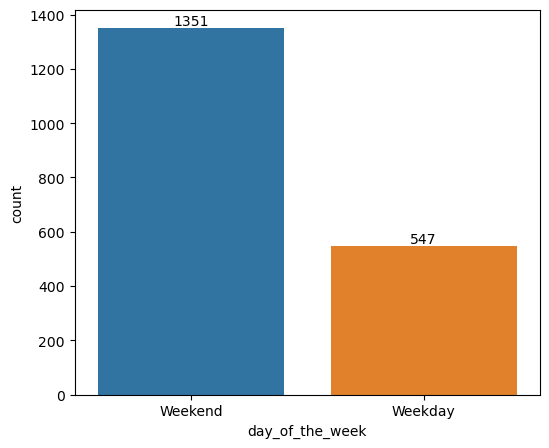

In [51]:
plt.figure(figsize=(6,5))
ax=sns.countplot(data=df,x='day_of_the_week')
for i in ax.containers:
    ax.bar_label(i)

##  3. Restaurant Performance
####  • What is the average food preparation time for each restaurant?

In [53]:
df.groupby(['restaurant_name'],as_index=False)['food_preparation_time'].mean().sort_values(by='food_preparation_time')

,restaurant_name,food_preparation_time
68,Haru Gramercy Park,20.0
3,67 Burger,20.0
58,Frank Restaurant,20.0
43,DespaÌ±a,20.5
132,Sarabeth's West,21.0
...,...,...
148,Taro Sushi,35.0
39,Cipriani Le Specialita,35.0
83,Kambi Ramen House,35.0
85,Klong,35.0


 #### • Which restaurant has the shortest average food preparation time?

In [54]:
 df.groupby(['restaurant_name'],as_index=False)['food_preparation_time'].mean().sort_values(by='food_preparation_time')

,restaurant_name,food_preparation_time
68,Haru Gramercy Park,20.0
3,67 Burger,20.0
58,Frank Restaurant,20.0
43,DespaÌ±a,20.5
132,Sarabeth's West,21.0
...,...,...
148,Taro Sushi,35.0
39,Cipriani Le Specialita,35.0
83,Kambi Ramen House,35.0
85,Klong,35.0


####  • How does the average delivery time compare across different restaurants?

In [55]:
df['delivery_time']=df['delivery_time'].astype('int')

In [57]:
df.groupby(['restaurant_name'],as_index=False)['delivery_time'].mean().sort_values(by='delivery_time')

,restaurant_name,delivery_time
60,Gaia Italian Cafe,15.0
110,Paul & Jimmy's,15.0
152,The MasalaWala,15.0
71,Hibino,15.0
40,Coppola's East,16.0
...,...,...
64,Haandi,30.5
58,Frank Restaurant,31.0
148,Taro Sushi,32.0
68,Haru Gramercy Park,32.0


In [58]:
 # avg_time=df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
 # plt.figure(figsize=(30,5))
 # sns.pointplot(data=df,x=avg_time['restaurant_name'],y=avg_time['delivery_time'])
 # plt.xticks(rotation=90)
 # plt.show()

#### d) Is there a correlation between the cost of the order and the rating given?

In [59]:
df[['cost_of_the_order','rating']].corr()


,cost_of_the_order,rating
cost_of_the_order,1.000000,0.028631
rating,0.028631,1.000000


<Axes: >

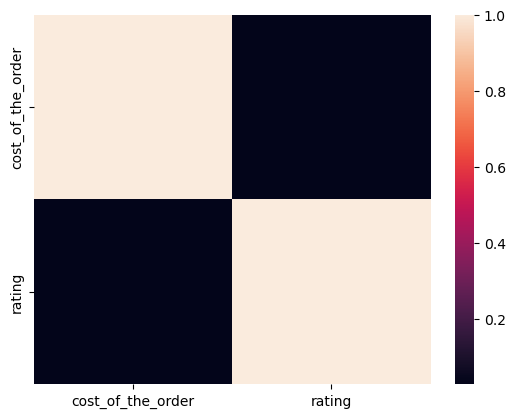

In [60]:
 sns.heatmap(data=df[['cost_of_the_order','rating']].corr())


##  4. Demand Patterns
#### a) How does the demand for different cuisine types vary on weekdays versus weekends?

In [61]:
 df.groupby('day_of_the_week')['cuisine_type'].value_counts()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          416
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            52
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

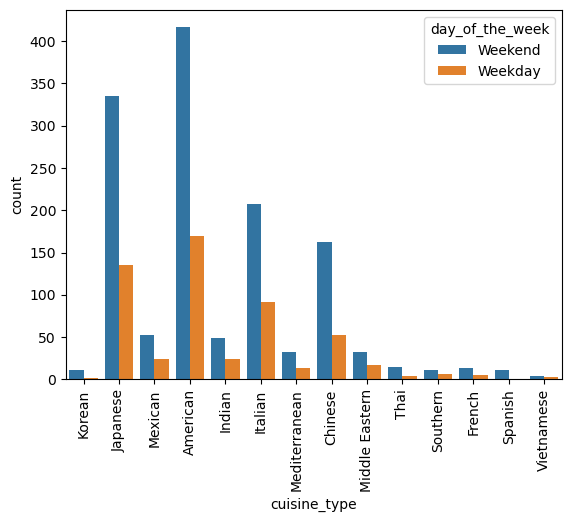

In [62]:
 sns.countplot(data=df,x=df['cuisine_type'],hue=df['day_of_the_week'])
 plt.xticks(rotation=90)

#### b) Which day of the week has the highest average order cost?

In [63]:

 df.groupby('day_of_the_week')['cost_of_the_order'].mean()

day_of_the_week
Weekday    16.311188
Weekend    16.584608
Name: cost_of_the_order, dtype: float64

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

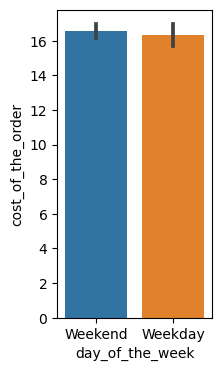

In [64]:

 plt.figure(figsize=(2,4))
 sns.barplot(data=df,x=df['day_of_the_week'],y=df['cost_of_the_order'])

####  c) What is the most common day for orders to be placed?

In [66]:
df1=df.groupby('day_of_the_week')['order_id'].count()
df1

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

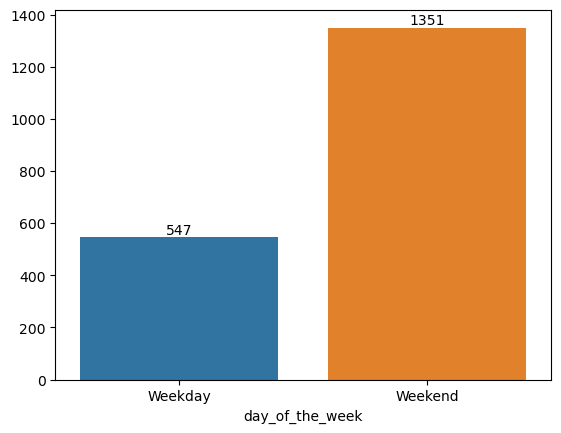

In [69]:
cdo=sns.barplot(data=df,x=df1.index,y=df1.values)
for i in cdo.containers:
    cdo.bar_label(i)

#### d) How does the average rating vary by cuisine type?

In [70]:
df.groupby('cuisine_type')['rating'].mean()

cuisine_type
American          4.300813
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64

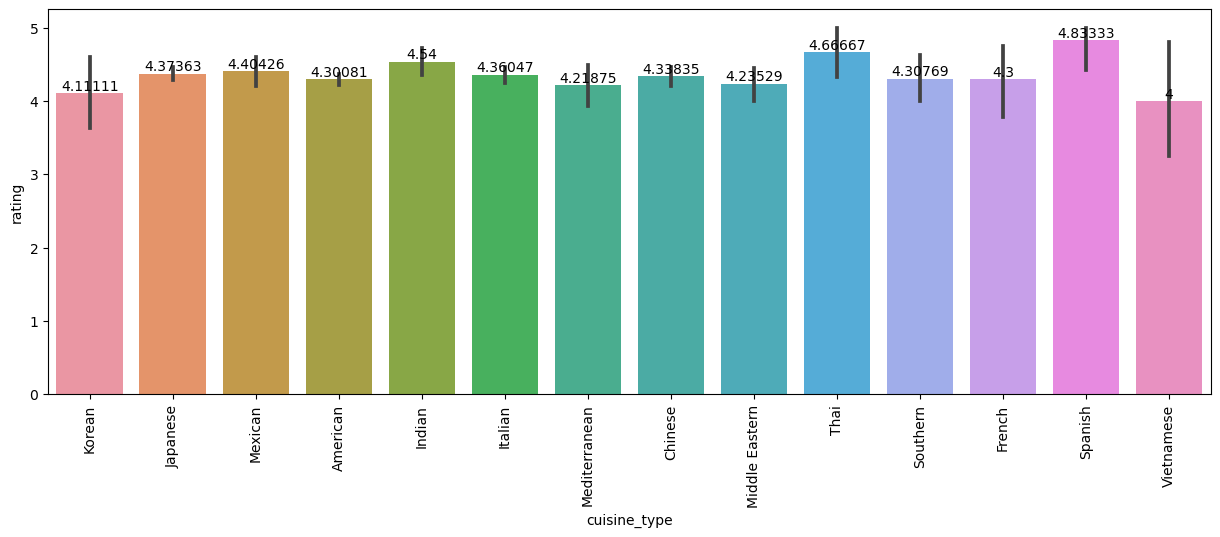

In [72]:
plt.figure(figsize=(15,5))
cr=sns.barplot(data=df,x=df['cuisine_type'],y=df['rating'])
plt.xticks(rotation=90)
for i in cr.containers:
    cr.bar_label(i)

## 5. Operational Efficiency
####  a) What is the average delivery time for all orders?

In [73]:

 df['delivery_time'].mean()

24.163329820864067

#### b) Which restaurant has the longest average delivery time?

In [75]:
longest_avg_dt=df.groupby('restaurant_name')['delivery_time'].mean()
longest_avg_dt.idxmax(),longest_avg_dt.max()

("Sarabeth's West", 33.0)

#### c) Is there a relationship between food preparation time and delivery time?

In [76]:
 df[['food_preparation_time','delivery_time']].corr()

,food_preparation_time,delivery_time
food_preparation_time,1.000000,0.011234
delivery_time,0.011234,1.000000


<Axes: >

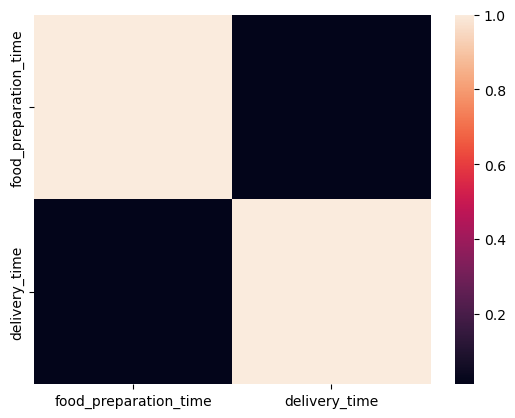

In [77]:
sns.heatmap(data=df[['food_preparation_time','delivery_time']].corr())

#### d) How does the delivery time impact customer ratings?

<Axes: >

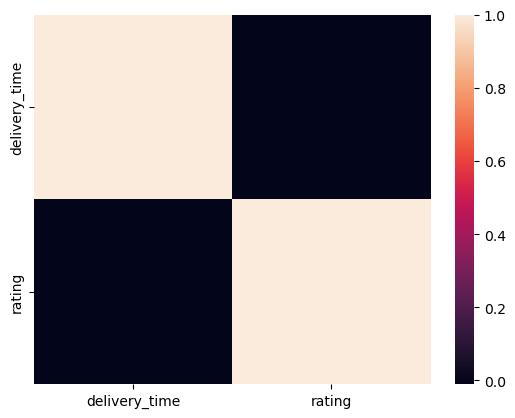

In [78]:
 sns.heatmap(data=df[['delivery_time','rating']].corr())

## 6. Customer Insights
####  a) What is the repeat order rate (number of customers who have placed more than one order)?


In [79]:
 df2=df[df['customer_id'].duplicated()]
 df3=df2['customer_id'].value_counts()
 df3[df3.values>1].head(10)

customer_id
52832     12
47440      9
83287      8
250494     7
259341     6
65009      6
276192     6
82041      6
60052      5
97991      5
Name: count, dtype: int64

In [80]:
df3[df3.values>1].shape

(149,)

 #### b) What percentage of orders receive a rating of 4 or higher?

In [81]:
(df[df['rating'] >= 4].shape[0] / df.shape[0]) * 100

51.31717597471022

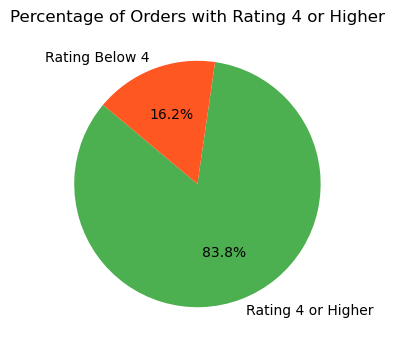

In [83]:
rating_counts = [df[df['rating'] >= 4].shape[0], df[df['rating'] < 4].shape[0]]
rating_labels = ['Rating 4 or Higher', 'Rating Below 4']
plt.figure(figsize=(4, 4))
plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'], startangle=140)
plt.title('Percentage of Orders with Rating 4 or Higher')
plt.show()

In [84]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25.0,25
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25.0,24
